In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix ,matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("ENB2012_data.csv")

In [3]:
data.columns=["relative_compactness","surface_area","wall_area","roof_area","overall_height","orientation",
                   "glazing_area","glazing_area_dist","heating_load","cooling_load"]

In [4]:
data['glazing_area'].value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: glazing_area, dtype: int64

In [5]:
data.corr()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load,cooling_load
relative_compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
surface_area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
wall_area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
roof_area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
overall_height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
glazing_area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
glazing_area_dist,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
heating_load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
cooling_load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<AxesSubplot:>

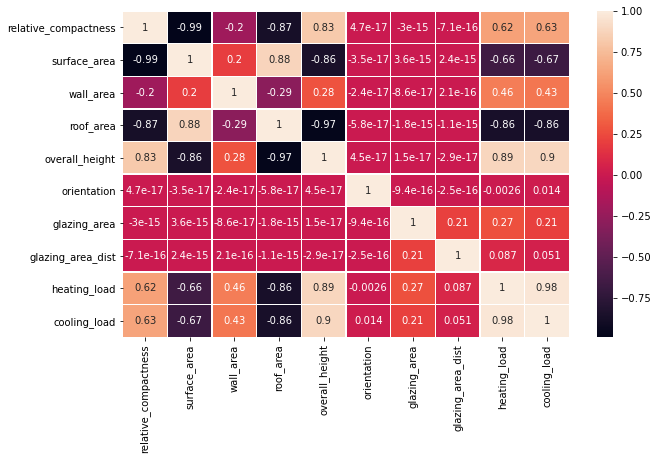

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), cmap ='rocket', linewidths = 0.30, annot = True)

In [7]:
X = data.drop(columns=['heating_load','cooling_load'])
y1 = data['heating_load'].values
y2 = data['cooling_load'].values

In [8]:
mi_scores1 = mutual_info_regression(X, y1, discrete_features= [2,4])
mi_scores1 = pd.Series(mi_scores1, name="MI Scores")
mi_scores1 = mi_scores1.sort_values(ascending=False)
mi_scores1

0    1.721351
1    1.719406
2    1.111829
3    0.942230
6    0.708658
4    0.663589
7    0.216549
5    0.000000
Name: MI Scores, dtype: float64

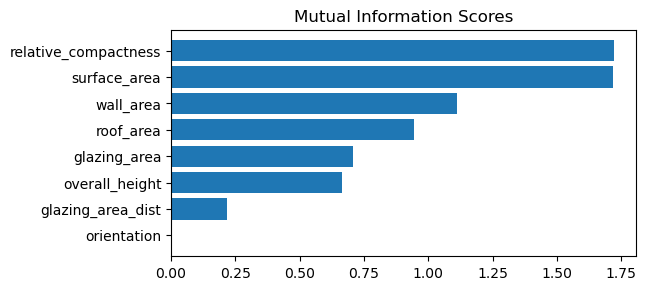

In [9]:
# Mutual information regression for heating load
col_names1 = reversed(X.columns[mi_scores1.index])
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = col_names1
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(6, 3))
plot_mi_scores(mi_scores1)

In [10]:
mi_scores2 = mutual_info_regression(X, y2, discrete_features= [5,7])
mi_scores2 = pd.Series(mi_scores2, name="MI Scores")
mi_scores2 = mi_scores2.sort_values(ascending=False)
mi_scores2

1    1.418722
0    1.412829
3    0.881164
2    0.863303
6    0.727064
4    0.680932
7    0.145957
5    0.000000
Name: MI Scores, dtype: float64

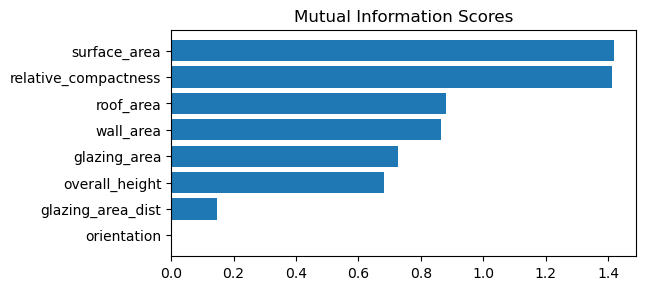

In [11]:
# Mutual information regression for cooling load
col_names2 = reversed(X.columns[mi_scores2.index])
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = col_names2
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(6, 3))
plot_mi_scores(mi_scores2)

In [12]:
# Scaling for heating load (discrete variables are not scaled)
pca_data = data.copy()
X_train_pca_data, X_test_pca_data, y_train_pca_data, y_test_pca_data = train_test_split(pca_data.drop(columns=['heating_load','cooling_load']), pca_data['heating_load'], test_size=0.3, random_state=15)
cont_scale_X_train_pca_data = X_train_pca_data.drop(columns=["orientation","glazing_area_dist"])
scaler = StandardScaler()
scaled_cont_X_train_pca_data = scaler.fit_transform(cont_scale_X_train_pca_data)
cont_scale_X_test_pca_data = X_test_pca_data.drop(columns=["orientation","glazing_area_dist"])
scaled_cont_X_test_pca_data = scaler.transform(cont_scale_X_test_pca_data)
X_test_pca_data_no_cont = X_test_pca_data[["orientation","glazing_area_dist"]]
X_test_pca_data_scaled = pd.concat([X_test_pca_data_no_cont, pd.DataFrame(scaled_cont_X_test_pca_data, columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'glazing_area'], index=X_test_pca_data_no_cont.index)], axis=1)
X_train_pca_data_no_cont = X_train_pca_data[["orientation","glazing_area_dist"]]
X_train_pca_data_scaled = pd.concat([X_train_pca_data_no_cont, pd.DataFrame(scaled_cont_X_train_pca_data, columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'glazing_area'], index=X_train_pca_data_no_cont.index )], axis=1)

In [13]:
cont_scale_X_test_pca_data

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area
343,0.90,563.5,318.5,122.5,7.0,0.25
728,0.86,588.0,294.0,147.0,7.0,0.40
73,0.74,686.0,245.0,220.5,3.5,0.10
254,0.82,612.5,318.5,147.0,7.0,0.10
741,0.76,661.5,416.5,122.5,7.0,0.40
...,...,...,...,...,...,...
589,0.82,612.5,318.5,147.0,7.0,0.40
661,0.66,759.5,318.5,220.5,3.5,0.40
265,0.74,686.0,245.0,220.5,3.5,0.10
247,0.90,563.5,318.5,122.5,7.0,0.10


In [14]:
X_train_pca_data_scaled

,orientation,glazing_area_dist,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area
521,3,5,-1.160806,1.258556,0.551563,0.967453,-0.994429,0.181705
546,4,1,0.238729,-0.391187,0.551563,-0.650156,1.005602,1.303262
493,3,5,0.518636,-0.666144,-0.006232,-0.650156,1.005602,0.181705
75,5,1,-0.227783,0.158728,-1.679620,0.967453,-0.994429,-0.939853
270,4,5,-0.507690,0.433685,-1.121824,0.967453,-0.994429,-0.939853
...,...,...,...,...,...,...,...,...
156,2,3,0.518636,-0.666144,-0.006232,-0.650156,1.005602,-0.939853
384,2,3,2.011473,-1.765972,-0.564028,-1.458961,1.005602,0.181705
645,3,3,-0.041178,-0.116230,2.224951,-1.189359,1.005602,1.303262
757,3,5,-0.974201,0.983599,-0.006232,0.967453,-0.994429,1.303262


In [15]:
# Linear regression is applied for heating load
model = linear_model.LinearRegression()
model.fit(X_train_pca_data_scaled, y_train_pca_data)
train_error = metrics.mean_squared_error(y_train_pca_data, model.predict(X_train_pca_data_scaled))
test_error = metrics.mean_squared_error(y_test_pca_data, model.predict(X_test_pca_data_scaled))
R2_test = model.score(X_test_pca_data_scaled, y_test_pca_data)
R2_train = model.score(X_train_pca_data_scaled, y_train_pca_data)

In [16]:
model.score(X_test_pca_data_scaled, y_test_pca_data)

0.9090109988048559

In [17]:
print(train_error,test_error)

8.12086834419994 9.582674497983565


In [18]:
print(R2_train, R2_test)

0.9187194988023781 0.9090109988048559


In [19]:
# Scaling for cooling load (discrete variables are not scaled)
X_train_pca_data, X_test_pca_data, y_train_pca_data, y_test_pca_data = train_test_split(pca_data.drop(columns=['heating_load','cooling_load']), pca_data['cooling_load'], test_size=0.3, random_state=15)
cont_scale_X_train_pca_data = X_train_pca_data.drop(columns=["orientation","glazing_area_dist"])
scaler = StandardScaler()
scaled_cont_X_train_pca_data = scaler.fit_transform(cont_scale_X_train_pca_data)
cont_scale_X_test_pca_data = X_test_pca_data.drop(columns=["orientation","glazing_area_dist"])
scaled_cont_X_test_pca_data = scaler.transform(cont_scale_X_test_pca_data)
X_test_pca_data_no_cont = X_test_pca_data[["orientation","glazing_area_dist"]]
X_test_pca_data_scaled = pd.concat([X_test_pca_data_no_cont, pd.DataFrame(scaled_cont_X_test_pca_data, columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'glazing_area'], index=X_test_pca_data_no_cont.index)], axis=1)
X_train_pca_data_no_cont = X_train_pca_data[["orientation","glazing_area_dist"]]
X_train_pca_data_scaled = pd.concat([X_train_pca_data_no_cont, pd.DataFrame(scaled_cont_X_train_pca_data, columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'glazing_area'], index=X_train_pca_data_no_cont.index )], axis=1)

In [20]:
# Linear regression is applied for cooling load
model = linear_model.LinearRegression()
model.fit(X_train_pca_data_scaled, y_train_pca_data)
train_error = metrics.mean_squared_error(y_train_pca_data, model.predict(X_train_pca_data_scaled))
test_error = metrics.mean_squared_error(y_test_pca_data, model.predict(X_test_pca_data_scaled))
R2_test = model.score(X_test_pca_data_scaled, y_test_pca_data)
R2_train = model.score(X_train_pca_data_scaled, y_train_pca_data)

In [21]:
print(train_error,test_error)

8.877658891089546 13.398611011317483


In [22]:
print(R2_train, R2_test)

0.897165568253574 0.8647879993454215


Random Forest Regression is used below.

In [23]:
X_train_heating, X_test_heating, y_train_heating, y_test_heating = train_test_split(X, y1, test_size = 0.3, random_state = 0)

In [24]:
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X, y2, test_size = 0.3, random_state = 0)

In [25]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [.25,.50,.75],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [26]:
rf_model = RandomForestRegressor(random_state = 15, bootstrap= True, n_jobs=-1)
rf_cv_model_heating = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
rf_cv_model_heating.fit(X_train_heating, y_train_heating)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1, random_state=15),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.25, 0.5, 0.75],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [27]:
rf_cv_model_heating.best_params_

{'max_depth': 9, 'max_features': 0.75, 'n_estimators': 200}

In [28]:
rf_model_heating = RandomForestRegressor(random_state = 15, bootstrap= True, n_jobs=-1, **rf_cv_model_heating.best_params_)
rf_model_heating.fit(X_train_heating, y_train_heating)

RandomForestRegressor(max_depth=9, max_features=0.75, n_estimators=200,
                      n_jobs=-1, random_state=15)

In [29]:
rf_cv_model_cooling = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
rf_cv_model_cooling.fit(X_train_cooling, y_train_cooling)
rf_model_cooling = RandomForestRegressor(random_state = 15, bootstrap= True, n_jobs=-1, **rf_cv_model_cooling.best_params_)
rf_model_cooling.fit(X_train_cooling, y_train_cooling)

RandomForestRegressor(max_depth=9, max_features=0.25, n_estimators=200,
                      n_jobs=-1, random_state=15)

In [30]:
def evaluation(model, xTrain, xTest, yTrain, yTest) -> None:
    print(f"Train rmse: {mean_squared_error(yTrain, model.predict(xTrain))}")
    print(f"Test rmse: {mean_squared_error(yTest, model.predict(xTest))}")
    print(f"Train R^2: {r2_score(yTrain, model.predict(xTrain))}")
    print(f"Test R^2: {r2_score(yTest, model.predict(xTest))}")

In [31]:
evaluation(rf_cv_model_heating, X_train_heating, X_test_heating, y_train_heating, y_test_heating)

Train rmse: 0.05889352060932209
Test rmse: 0.2777497718498712
Train R^2: 0.9994121230350459
Test R^2: 0.9973579542041964


In [32]:
evaluation(rf_cv_model_cooling, X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling)

Train rmse: 0.8747838404344381
Test rmse: 2.6418233806730407
Train R^2: 0.9903237253075843
Test R^2: 0.9707111556184268
